100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.04s/it]


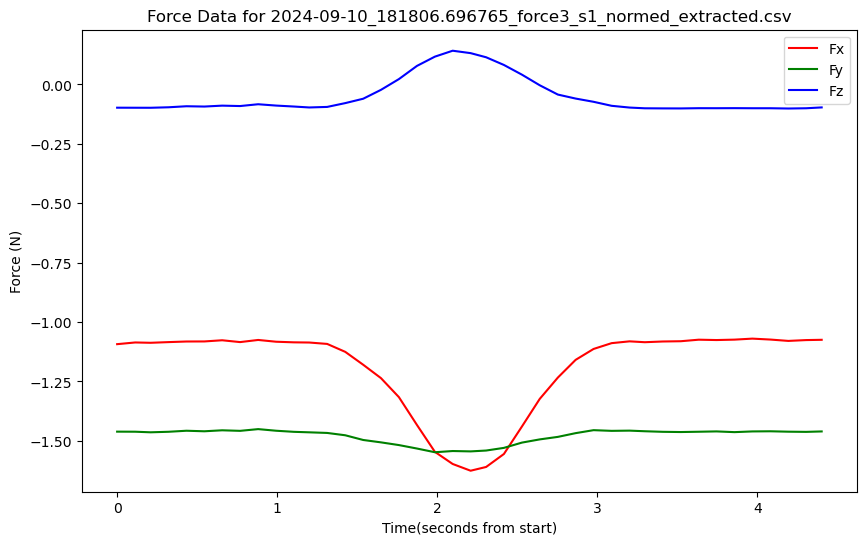

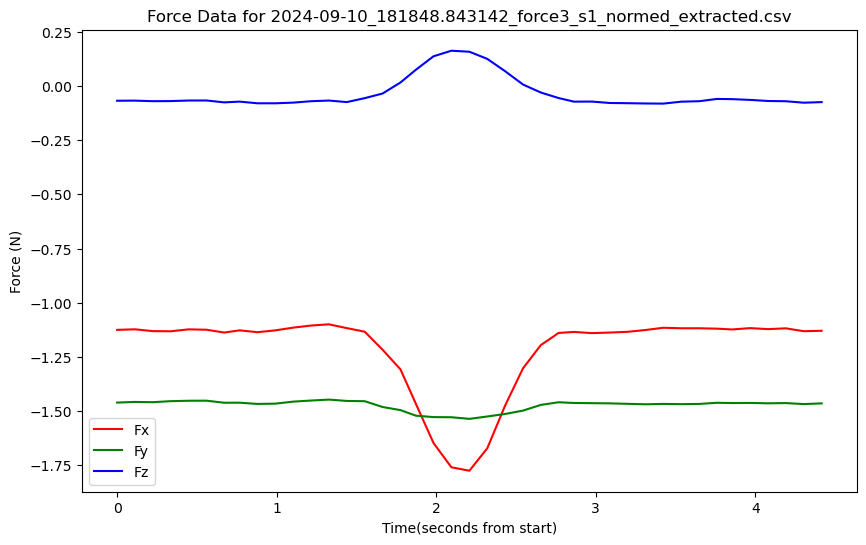

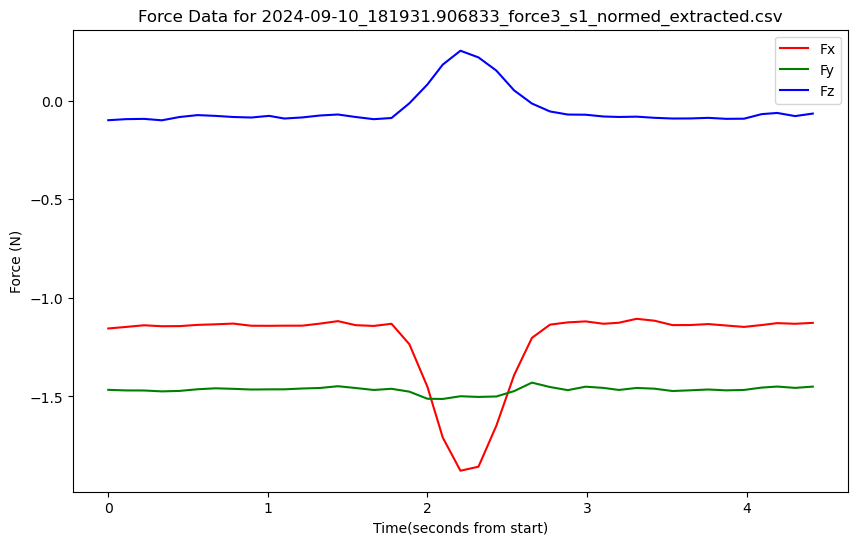

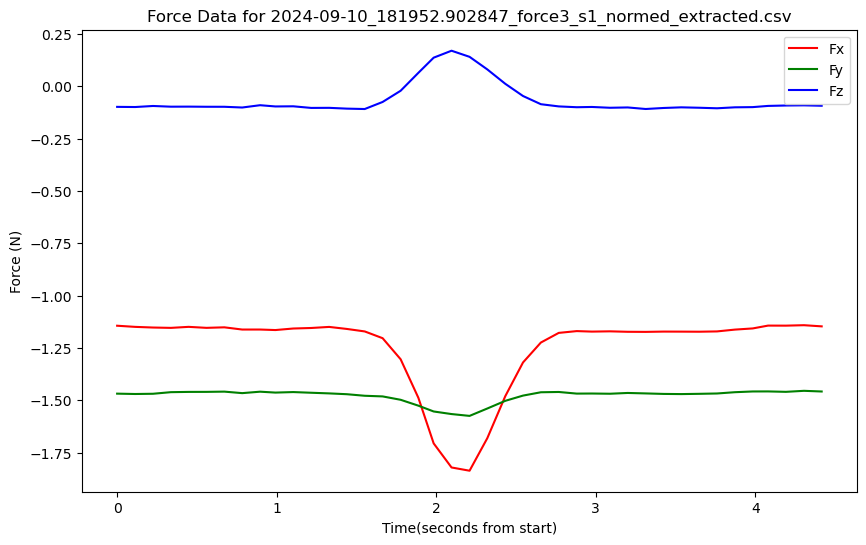

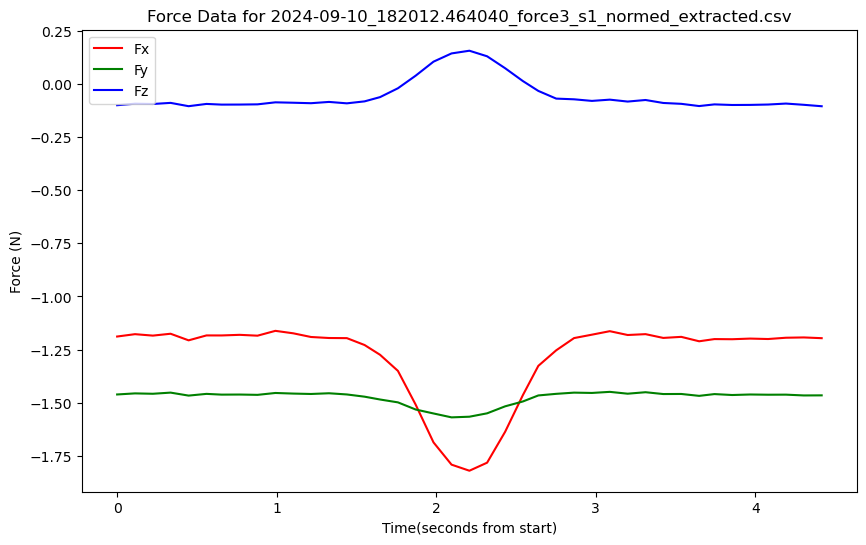

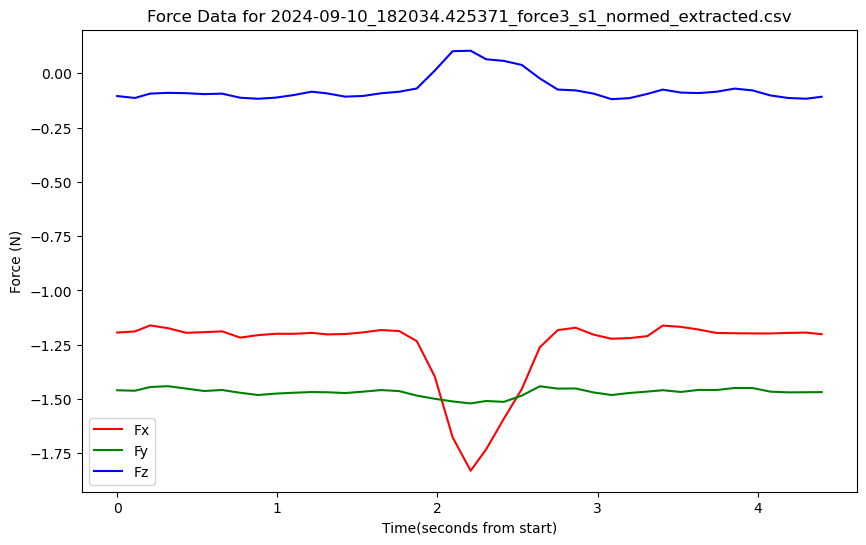

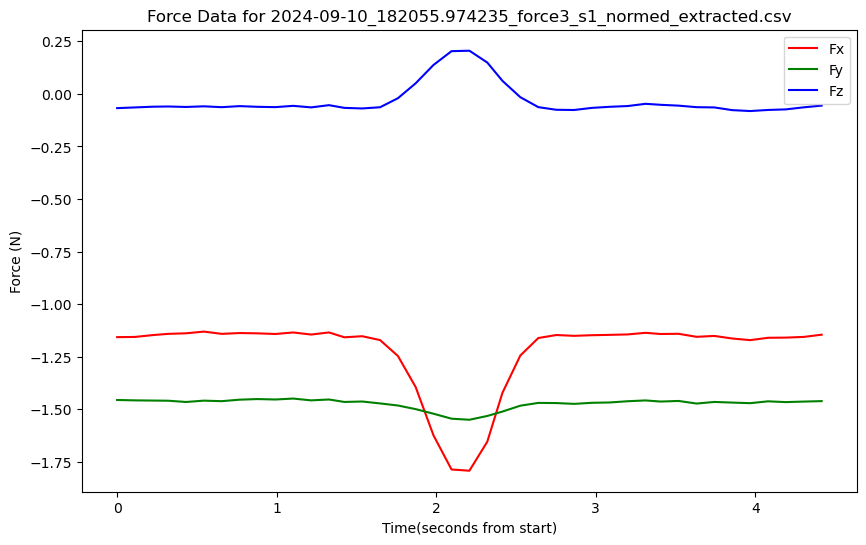

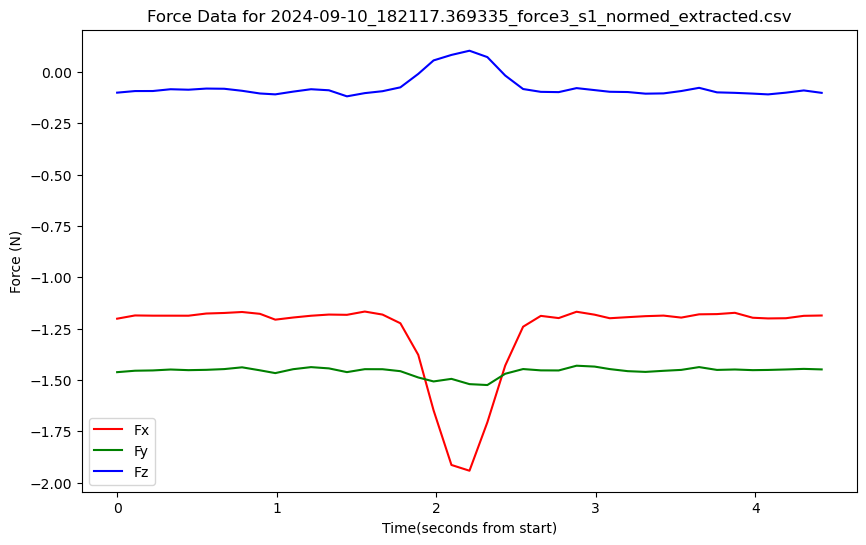

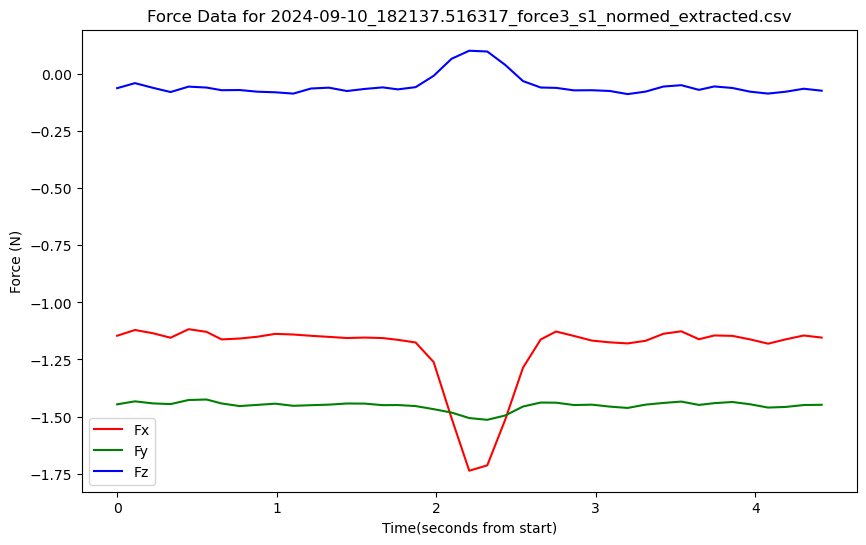

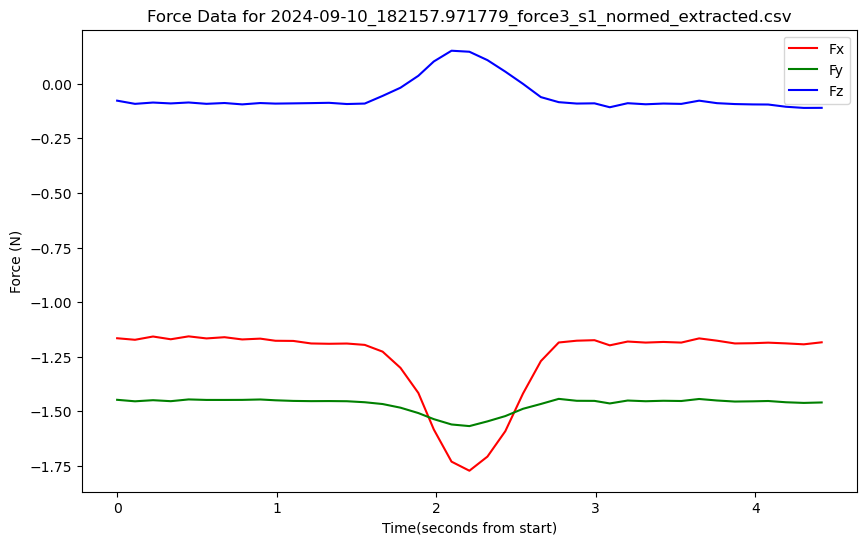

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm

# グラフの保存先ディレクトリ
graph_save_path = r"E:\てすりとキネクト（てすり）\3回目変換後\平滑、正規化後3回目データ\抽出後データ\グラフ" # グラフの保存先を指定

# CSVファイルが格納されているディレクトリを指定
dataList = glob.glob(r"E:\てすりとキネクト（てすり）\3回目変換後\平滑、正規化後3回目データ\抽出後データ\*force3_s1_normed_extracted.csv")  

for fileName in tqdm(dataList):
    # 変換後のCSVファイルを読み込み
    data = pd.read_csv(fileName, header=0, names=["Time", "SensorID", "Fx", "Fy", "Fz"])
    
   # Time列をdatetime型に変換
    data["Time"] = pd.to_datetime(data["Time"])
    
    # 時間分解能（間隔）を計算
    time_intervals = (data["Time"] - data["Time"].iloc[0]).dt.total_seconds() 
    # データをプロット
    plt.figure(figsize=(10, 6))

    # x軸の力
    plt.plot(time_intervals, data["Fx"], label='Fx', color='r')
    
    # y軸の力
    plt.plot(time_intervals, data["Fy"], label='Fy', color='g')
    
    # z軸の力
    plt.plot(time_intervals, data["Fz"], label='Fz', color='b')
    
    # グラフのタイトルやラベルの設定
    plt.title(f'Force Data for {os.path.basename(fileName)}')
    plt.xlabel('Time(seconds from start)')
    plt.ylabel('Force (N)')
    plt.legend()
    
    # グラフの保存
    graph_file_name = os.path.join(graph_save_path, os.path.basename(fileName).replace(".csv", ".png"))
    plt.savefig(graph_file_name)
    
    # グラフの表示
    #plt.show()